In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

## 2.1 Least Squares Fitting
### 2.2 Polynomial Regression Function

In [2]:
def polynomial_regression(x_in, y_in, poly_degree):
    x_arr = np.array(np.empty((len(x_in),0)))
    #Preparation of data
    for i in range(poly_degree+1):
        temp = np.power(x_in, i)
        x_arr = np.column_stack((x_arr, temp))
    
    x = np.asmatrix(x_arr)
    x_t = x.transpose()
    y = np.asmatrix(y_in)
    
    #Matrix multiplication, find beta
    beta = np.matmul(np.linalg.inv(np.matmul(x_t,x)),np.matmul(x_t,y))
    return x, beta


### 2.3

Beta_0:  0.6351222361926413
Beta_1:  1.7332127953664294
Sum of Squared Errors:  0.7433354116956697


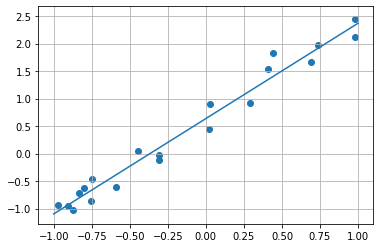

In [3]:
x1 = np.load('data1_x.npy')
y1 = np.load('data1_y.npy')

#Polynomial Regression
x1_out, beta1 = polynomial_regression(x1, y1, 1)
print('Beta_0: ', beta1.item(0))
print('Beta_1: ', beta1.item(1))
#Sum of Squared Errors
SSE1 = np.sum(np.power(y1 - np.dot(x1_out,beta1),2))
print('Sum of Squared Errors: ', SSE1)
#Plot
def p1(x):
    return beta1.item(1)*x + beta1.item(0)
X = np.linspace(-1,1,100)
poly1 = p1(X)
plt.plot(X,poly1)
plt.scatter(x1, y1)
plt.grid()
plt.show()

### 2.4

Beta_0:  0.975719627438592
Beta_1:  -0.025719508065752468
Beta_2:  -1.5322352928040788
Sum of Squared Errors:  1.3415937153692248


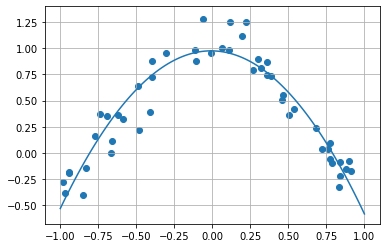

In [4]:
x2 = np.load('data2_x.npy')
y2 = np.load('data2_y.npy')

#Polynomial Regression
x2_out, beta2 = polynomial_regression(x2, y2, 2)
print('Beta_0: ', beta2.item(0))
print('Beta_1: ', beta2.item(1))
print('Beta_2: ', beta2.item(2))

#Sum of Squared Errors
SSE2 = np.sum(np.power(y2 - np.dot(x2_out,beta2),2))
print('Sum of Squared Errors: ', SSE2)
#Plot
def p2(x):
    return beta2.item(2)*x**2 + beta2.item(1)*x + beta2.item(0)
X = np.linspace(-1,1,100)
poly2 = p2(X)
plt.plot(X,poly2)
plt.scatter(x2, y2)
plt.grid()
plt.show()

### 2.5

Beta_0:  1.0523352339144487
Beta_1:  -0.07159753732889047
Beta_2:  -1.6313333867688136
Sum of Squared Errors:  5.0248727109265925


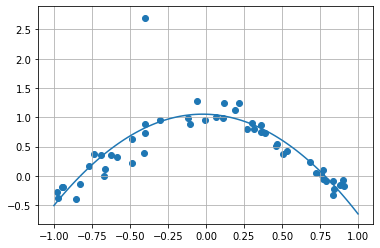

In [5]:
x2a = np.load('data2a_x.npy')
y2a = np.load('data2a_y.npy')

#Polynomial Regression
x2a_out, beta2a = polynomial_regression(x2a, y2a, 2)
print('Beta_0: ', beta2a.item(0))
print('Beta_1: ', beta2a.item(1))
print('Beta_2: ', beta2a.item(2))

#Sum of Squared Errors
SSE2a = np.sum(np.power(y2a - np.dot(x2a_out,beta2a),2))
print('Sum of Squared Errors: ', SSE2a)
#Plot
def p2a(x):
    return beta2a.item(2)*x**2 + beta2a.item(1)*x + beta2a.item(0)
X = np.linspace(-1,1,100)
poly2a = p2a(X)
plt.plot(X,poly2a)
plt.scatter(x2a, y2a)
plt.grid()
plt.show()

In [6]:
SSE2a_in = np.sum(np.power(y2 - np.dot(x2_out,beta2a),2))
print('SSE without outlier: ', SSE2a_in)

SSE without outlier:  1.4903257195791868


# 2.2 Regularization
The goal of this second part is to illustrate linear regression with regularization. We’ll
experiment with Ridge Regression and Lasso.
1. Load the data in files ‘data3_x.npy’ and ‘data3_y.npy’ which contain 3-dimensional
features in variable x and a single output y. One of the features in x is irrelevant.
2. (T) Explain Ridge and Lasso regularization methods and explain how Lasso can be
used for feature selection. Use expressions when appropriate.
3. Instantiate Ridge and Lasso models. {Ridge, Lasso from sklearn.linear_model}
4. Fit Ridge and Lasso models to your data for values of α in the range 10−3
to 10 with
step size 0.01. Set the maximum number of iterations to 10000.
5. Plot the Lasso and Ridge coefficients against α, using a logarithmic scale for the α
axis. For comparison plot the LS coefficients in the same figure (α = 0). {plot from
matplotlib}
6. Comment on what you observe in the plot. Identify the irrelevant feature.
7. Consider now only the Lasso method. Choose an adequate value for α. Plot y and
the fit obtained for that value of α and compare with the LS fit. Compute the SSE in
both cases. Comment.

In [2]:
from sklearn.linear_model import Ridge, Lasso

In [3]:
#1
x3 = np.load('data3_x.npy')
y3 = np.load('data3_y.npy')

alphas = np.linspace(1e-3, 10, 10000)

(0.000630957344480193,
 15.848931924611133,
 -0.1468832938122354,
 3.084549170056943)

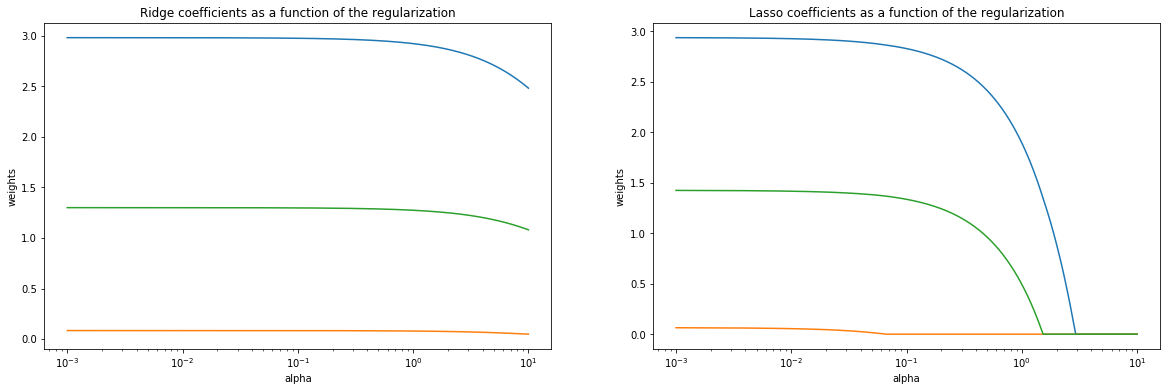

In [4]:
#Ridge
coefs_ridge = []
for a in alphas:
    ridge = Ridge(alpha=a, fit_intercept=False)
    ridge.fit(x3, y3)
    coefs_ridge.append(ridge.coef_)

coefs_ridge = np.reshape(coefs_ridge, (len(alphas),3))

plt.figure(figsize=(20, 6))

plt.subplot(121)
ax = plt.gca()
ax.plot(alphas, coefs_ridge)

ax.set_xscale('log')
plt.xlabel('alpha')
plt.ylabel('weights')
plt.title('Ridge coefficients as a function of the regularization')
plt.axis('tight')

#Lasso
coefs_lasso = []
for a in alphas:
    lasso = Lasso(alpha=a)
    lasso.fit(x3, y3)
    coefs_lasso.append(lasso.coef_)
    

plt.subplot(122)
ax = plt.gca()
ax.plot(alphas, coefs_lasso)
ax.set_xscale('log')
plt.xlabel('alpha')
plt.ylabel('weights')
plt.title('Lasso coefficients as a function of the regularization')
plt.axis('tight')